In [27]:
import folium 
import pandas as pd
import json
import os
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 200)  # Adjust this number as needed
pd.set_option('display.max_columns', 50)  # Adjust this number as needed

In [197]:
import json
from shapely.geometry import Point, MultiPolygon, Polygon
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt

# Define a function to safely extract coordinates or create geometry
def extract_geometry(geo_json_str):
    try:
        geo_dict = json.loads(geo_json_str)
        if 'coordinates' in geo_dict:
            coords = geo_dict['coordinates']
            if geo_dict['type'] == 'Point' and len(coords) == 2:
                return Point(coords)  # Return Point geometry
            elif geo_dict['type'] == 'MultiPolygon':
                # Convert to MultiPolygon
                polygons = [Polygon(polygon[0]) for polygon in coords if len(polygon) > 0]
                return MultiPolygon(polygons) if polygons else None
        return None  # Invalid geometry type
    except (json.JSONDecodeError, TypeError, ValueError):
        return None  # Handle parsing errors

# Apply the function to extract geometry
def spatial_dist_of_events(df, events_dataframe_name='events'):
    df['geometry'] = df['GEO'].apply(extract_geometry)

    # Filter out rows with missing or invalid geometries
    valid_locations = df.dropna(subset=['geometry'])

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(valid_locations, geometry='geometry')

    # Set the original CRS (WGS84 - EPSG:4326)
    gdf.set_crs(epsg=4326, inplace=True)

    # Convert to Web Mercator (EPSG:3857) for compatibility with contextily basemaps
    gdf = gdf.to_crs(epsg=3857)

    # Plot the points and multipolygons with different colors based on the 'CATEGORY' column
    ax = gdf.plot(column='CATEGORY', cmap='Set1', legend=True, figsize=(20, 14), markersize=3, alpha=0.6)

    # Add a basemap from contextily
    ctx.add_basemap(ax, crs=gdf.crs)

    # Title
    plt.title(f"Spatial distribution of {events_dataframe_name}")

    # Save the figure before displaying it
    plt.savefig(f'../../results/1.2_spatial_distribution/{events_dataframe_name}.PNG', bbox_inches='tight', dpi=300)
    plt.show()


In [189]:
# read events

df_attended_events = pd.read_csv('../../data_CityEvent/Cityevents/Demand_Intelligence_for_Attended_Events_California-0.csv')

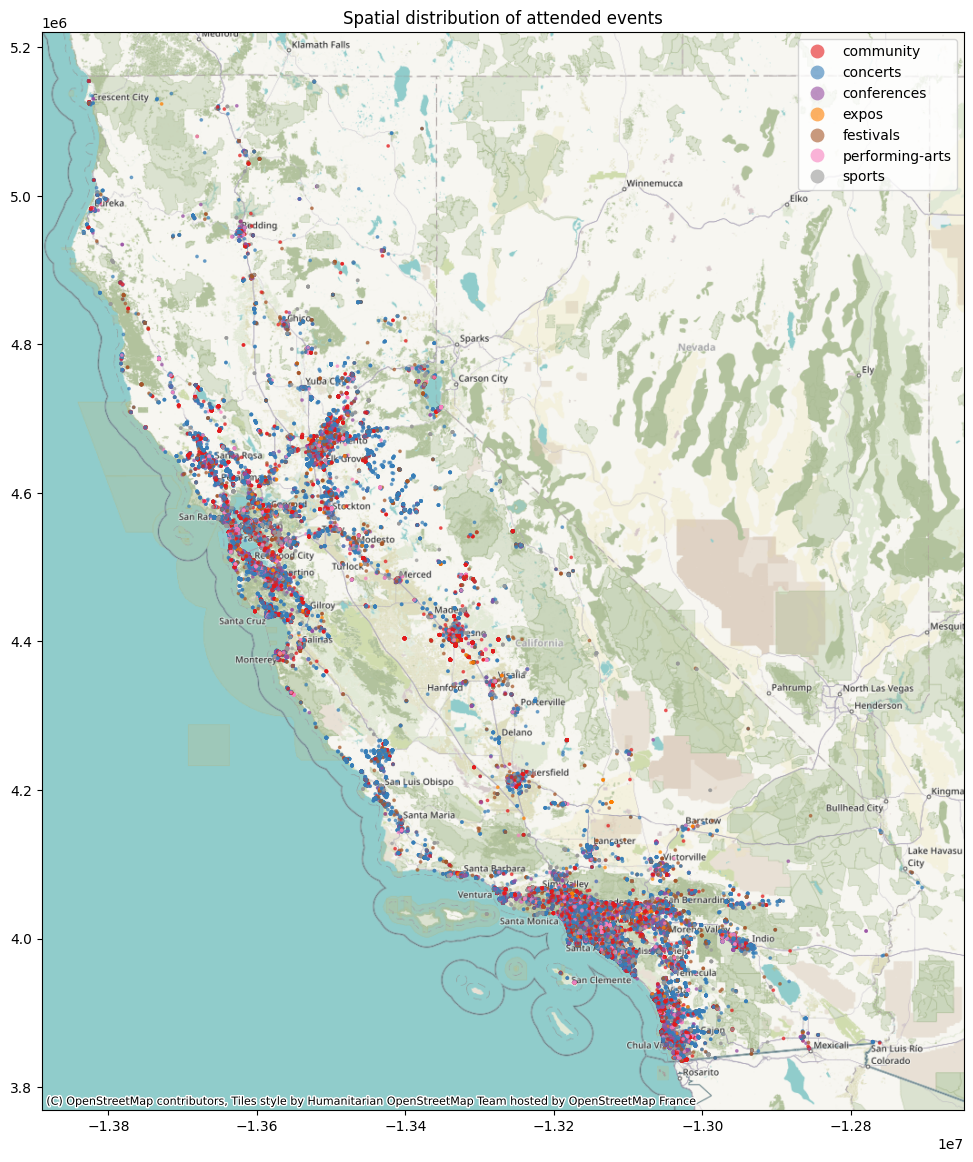

In [198]:
spatial_dist_of_events(df_attended_events, 'attended events')

In [191]:
df_non_attended_events = pd.read_csv('../../data_CityEvent/Cityevents/Demand_Intelligence_for_Non_Attended_Events_California-0.csv')

In [192]:
df_non_attended_events.shape

(20070, 32)

In [193]:
school_holidays = df_non_attended_events[df_non_attended_events['CATEGORY'] == 'school-holidays']
display(school_holidays.shape)

(13057, 32)

In [119]:
import random
# Generate a random number between 0 and 13057
x = random.randint(0, 13057)
print(x)

4449


In [137]:
import random
# Generate a random number between 0 and 13057
x = random.randint(0, 13057)
print(x)
print(school_holidays.iloc[x]['GEO'])

9918
{"coordinates":[[[-118.04988399999999,34.09647499999998],[-118.05514799999997,34.12220000000004],[-118.05500700000003,34.12348399999997],[-118.05584799999998,34.123362],[-118.05579700000003,34.123186000000004],[-118.05633299999997,34.12310900000003],[-118.05648500000002,34.123872000000006],[-118.05594899999998,34.123946999999994],[-118.05607400000002,34.124524000000044],[-118.05675199999999,34.124502],[-118.05672100000001,34.12514200000002],[-118.05642199999996,34.12519800000003],[-118.05657300000001,34.125831000000005],[-118.05761599999998,34.12568000000003],[-118.05740700000001,34.124597000000044],[-118.057847,34.12453000000001],[-118.05807299999996,34.12561399999999],[-118.06730100000001,34.124273999999964],[-118.06736599999996,34.13076199999997],[-118.073177,34.13040699999999],[-118.07295600000002,34.123001999999964],[-118.08156500000001,34.12104399999996],[-118.08151299999997,34.11739700000001],[-118.08065099999996,34.113517999999964],[-118.08230199999997,34.11350700000003],[

In [138]:
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt

def multipolygon_plotter(multipolygon_data):
    multipolygon_data = json.loads(multipolygon_data)
    # Create the geometry from the coordinates
    geometry = shape(multipolygon_data)

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame({"geometry": [geometry]}, crs="EPSG:4326")

    # Plot the multipolygon
    gdf.plot(edgecolor='k', color='lightblue')
    plt.title("Multipolygon Plot")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


9777
{"coordinates":[[[[-122.00931699999998,37.27866600000004],[-122.00671399999999,37.28119700000002],[-122.00587900000001,37.285482],[-122.01983899999998,37.286432],[-122.01517000000003,37.282600000000016],[-122.02311,37.28406300000001],[-122.04577799999998,37.28377000000001],[-122.04573899999995,37.279241999999996],[-122.05927199999996,37.279108000000015],[-122.05940800000002,37.28273999999997],[-122.06399900000001,37.28271700000002],[-122.06403799999995,37.28635099999996],[-122.06851799999998,37.28627299999999],[-122.06856799999996,37.27196000000002],[-122.07535999999998,37.27203500000001],[-122.07573799999999,37.27043],[-122.07757200000003,37.27053000000001],[-122.07758299999996,37.27204600000003],[-122.08641999999999,37.272007],[-122.09154999999998,37.268237],[-122.09528900000001,37.268719999999995],[-122.09527200000002,37.264665000000036],[-122.09960799999996,37.26463400000005],[-122.09964799999997,37.26816100000002],[-122.103897,37.26846700000002],[-122.10365399999996,37.264610

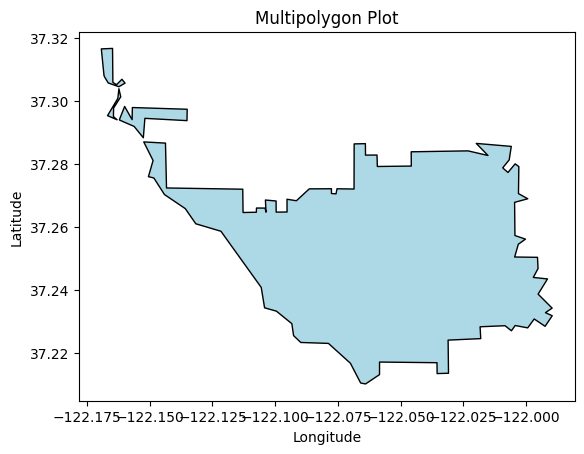

In [162]:
x = random.randint(0, 13057)
print(x)
print(school_holidays.iloc[x]['GEO'])
multipolygon_plotter(school_holidays.iloc[x]['GEO'])

4830
{"coordinates":[[[-121.11124199999998,41.995672000000035],[-121.16847700000002,41.99717800000003],[-121.20090299999995,41.99742700000002],[-121.24724399999997,41.99728799999999],[-121.29021099999996,41.99743599999997],[-121.32881200000001,41.99680200000001],[-121.34491099999997,41.99621400000003],[-121.35939900000002,41.99655899999997],[-121.36323699999997,41.99649899999998],[-121.54631700000002,41.99851200000001],[-121.68061900000004,42.00040800000003],[-121.68054800000002,41.99312299999999],[-121.68093599999997,41.951557],[-121.68130700000002,41.93862100000002],[-121.67769499999994,41.93790500000002],[-121.67805000000001,41.93789000000002],[-121.67802100000002,41.93776499999998],[-121.67773899999995,41.93776499999998],[-121.67896199999997,41.89282599999998],[-121.68085999999998,41.892282],[-121.68249200000001,41.89206599999998],[-121.68258499999999,41.86351700000002],[-121.63726799999998,41.86287600000001],[-121.62678200000002,41.862602999999986],[-121.61385599999997,41.86270000

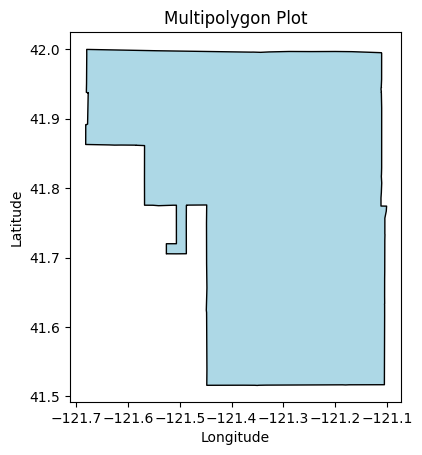

In [164]:
x = random.randint(0, 13057)
print(x)
print(school_holidays.iloc[x]['GEO'])
multipolygon_plotter(school_holidays.iloc[x]['GEO'])

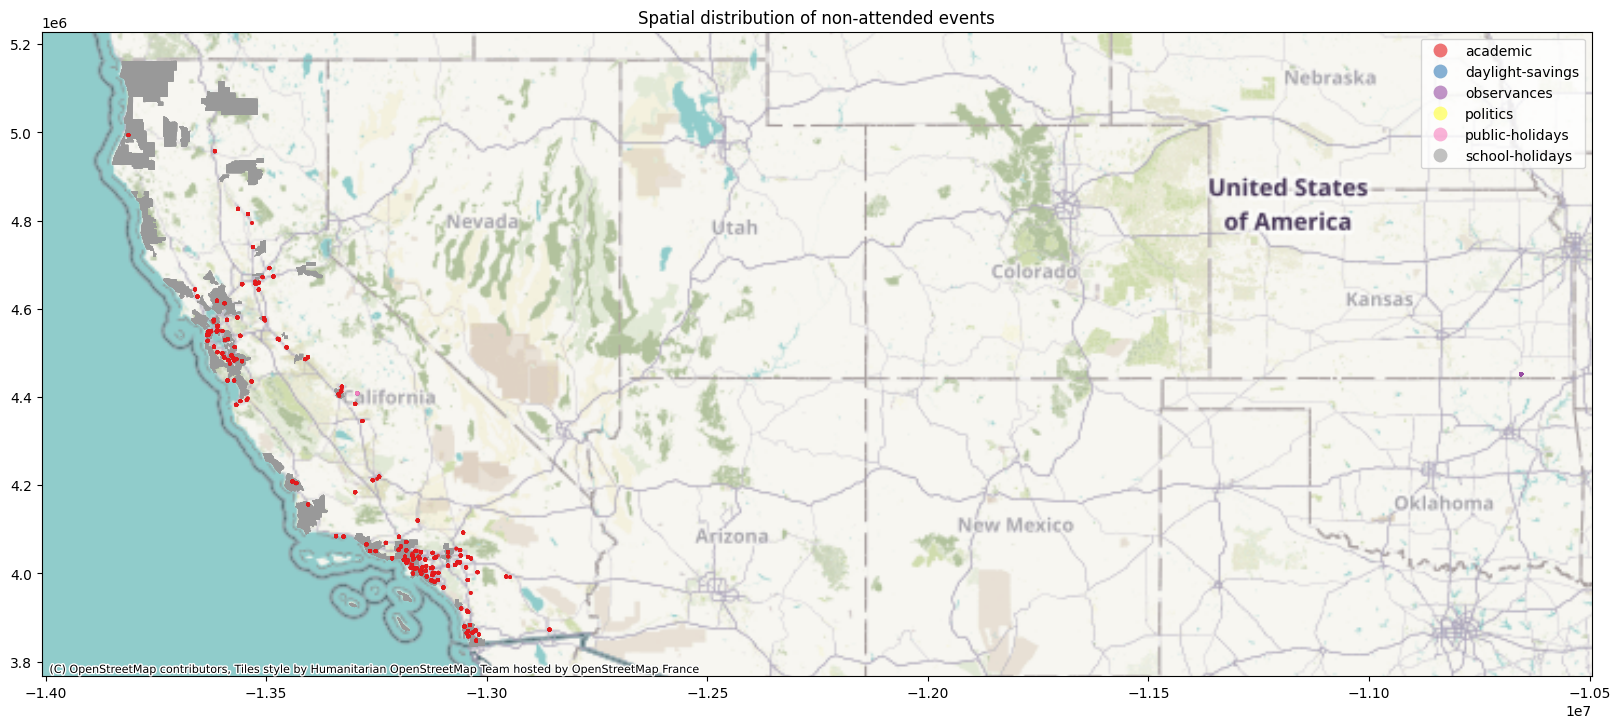

In [199]:
spatial_dist_of_events(df_non_attended_events, 'non-attended events')

In [201]:
df_unscheduled_events = pd.read_csv('../../data_CityEvent/Cityevents/Demand_Intelligence_for_Unscheduled_Events_North_America-0.csv') 

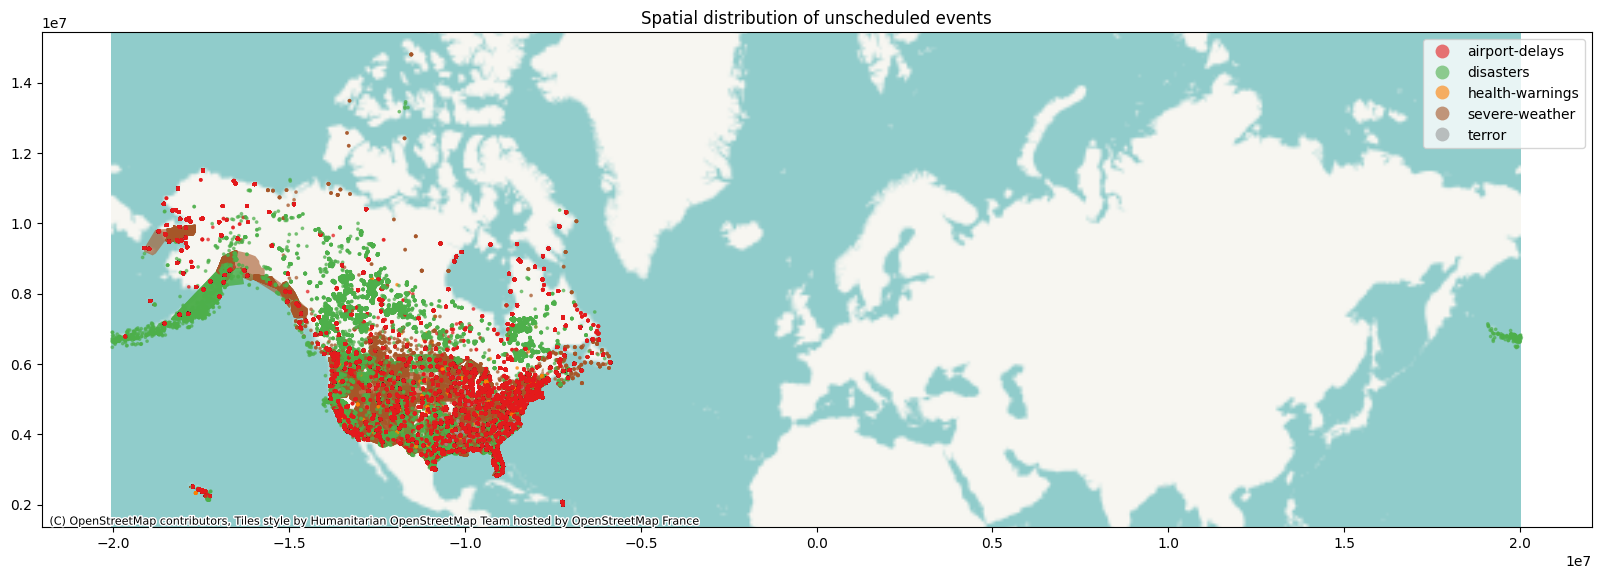

In [202]:
spatial_dist_of_events(df_unscheduled_events, 'unscheduled events')